# Multivariate Polynomial Regression

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.tree import DecisionTreeRegressor

Import OSNIR Dataset and shuffle data

In [32]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_values_extendedv3_new datasetbcsv.csv')
# shuffling rows of OSNIR dataframe and reset indexes
df = df.sample(frac=1)
df.reset_index(inplace=True, drop=True)

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [33]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the Decision Tree Model

In [34]:
#MPR model
model_PF = PolynomialFeatures(degree=2)
x_train_PF = model_PF.fit_transform(x_train)

#Fit Linear Model with Polynomial Features
model = LinearRegression().fit(x_train_PF,y_train)


In [35]:
OSNIR_num = data[:3000-1,0]
Input_num = model_PF.fit_transform(data[:3000-1,1:7])


In [36]:
OSNIR_est = (model.predict(Input_num))

In [37]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[1.0, 10.0, -8.0, 10.0, 25.0, 0.0, 9.0, 100.0, -80.0, 100.0, 250.0, 0.0, 90.0, 64.0, -80.0, -200.0, -0.0, -72.0, 100.0, 250.0, 0.0, 90.0, 625.0, 0.0, 225.0, 0.0, 0.0, 81.0] => 29.156186 (expected 28.237409)
[1.0, 40.0, -8.0, 100.0, 25.0, 0.0, 9.0, 1600.0, -320.0, 4000.0, 1000.0, 0.0, 360.0, 64.0, -800.0, -200.0, -0.0, -72.0, 10000.0, 2500.0, 0.0, 900.0, 625.0, 0.0, 225.0, 0.0, 0.0, 81.0] => 5.873785 (expected 4.992929)
[1.0, 10.0, -1.0, 10.0, 12.5, 0.0, 9.0, 100.0, -10.0, 100.0, 125.0, 0.0, 90.0, 1.0, -10.0, -12.5, -0.0, -9.0, 100.0, 125.0, 0.0, 90.0, 156.25, 0.0, 112.5, 0.0, 0.0, 81.0] => 23.241240 (expected 21.019401)
[1.0, 9.0, 0.0, 100.0, 12.5, 0.0, 9.0, 81.0, 0.0, 900.0, 112.5, 0.0, 81.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000.0, 1250.0, 0.0, 900.0, 156.25, 0.0, 112.5, 0.0, 0.0, 81.0] => 16.217468 (expected 14.825849)
[1.0, 35.0, 0.0, 100.0, 25.0, 0.0, 9.0, 1225.0, 0.0, 3500.0, 875.0, 0.0, 315.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000.0, 2500.0, 0.0, 900.0, 625.0, 0.0, 225.0, 0.0, 0.0, 81.0] => 9

In [38]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [39]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_LR.csv",index=False)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00033344, 0.00800267, 0.05435145,
        0.1357119 , 0.22407469, 0.22174058, 0.18572858, 0.10770257,
        0.02800934, 0.01233745, 0.00666889, 0.00366789, 0.003001  ,
        0.00266756, 0.00266756, 0.00166722, 0.00100033, 0.        ,
        0.        , 0.        , 0.00066689, 0.        , 0.        ]),
 array([-10.        ,  -9.42857143,  -8.85714286,  -8.28571429,
         -7.71428571,  -7.14285714,  -6.57142857,  -6.        ,
         -5.42857143,  -4.85714286,  -4.28571429,  -3.71428571,
         -3.14285714,  -2.57142857,  -2.        ,  -1.42857143,
         -0.85714286,  -0.28571429,   0.28571429,   0.85714286,
          1.42857143,   2.        ,   2.57142857,   3.14285714,
          3.71428571,   4.28571429,   4.85714286,   5.42857143,
          6.        ,   6.57142857,   7.14285714,   7.71428571,
          

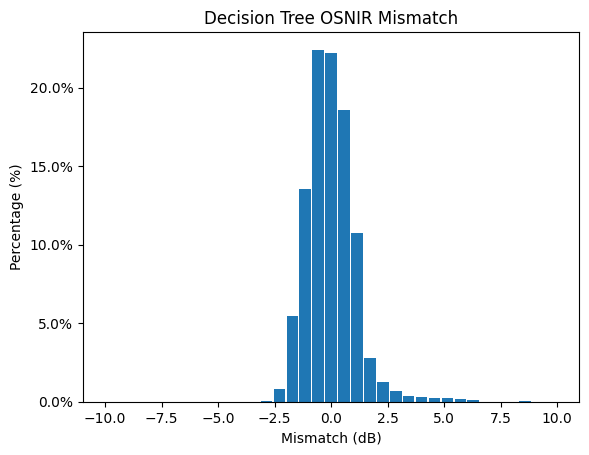

In [40]:
plt.title('Decision Tree OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism, range=(-10,10), rwidth=0.9, bins=35, weights=np.ones(len(Mism))/len(Mism))